# **ch.05 트리 알고리즘**  
## 05-1 결정 트리  
### 풀어야 할 문제:  
> ### alcohol, sugar, pH value feature를 사용하여  wine을 classify하되, 해석하기 쉬운 model을 만들라  
### *로지스틱 회귀로 와인 분류하기*  
dataframe 준비

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

head() method로 dataframe 확인

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


주어진 문제는 3개의 feature를 사용하여 red wine과 white wine을 분류하는 binary classification이고, white wine이 positive class


info() method를 사용하여 각 column의 data type과 null data 유무 확인

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


+ 총 6497개의 samples
+ 4 columns 모두 real number
+ Non-Null Count value가 모두 6497이므로 null data는 없음


만약, null data(누락된 값)이 있다면 해당 data를 버리거나 mean하여 채울 수 있음  
어떤 방식이 더 나은지는 미리 알기 어려움 &rarr; 두 방법 모두 사용해 보는 것이 좋음  
mean할 때는 train set의 statistic value로 test set을 변환해야 함


descibe() method로 각 column에 대한 간단한 statistic value 확인

In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


위 결과를 통해 feature의 scale이 다르다는 것을 알 수 있음  
&rarr; scale에 대한 preprocessing(normalization)이 필요함


preprocessing 수행 전에 data를 numpy array로 변환하고,  
train set과 test set 나누기  
(주어진 data가 충분하므로, test_size parameter를 0.2로 설정하여 data의 20%만 test set으로 사용)

In [5]:
from sklearn.model_selection import train_test_split

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

train set, test set의 shape 확인

In [6]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


preprocessing: scale normalization

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

준비한 data로 train logistic regression model,  
score model

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


score(accuracy)가 높지 않음, 두 가지 score 모두 낮으므로 underfitting  
&rarr; 이를 해결하기 위해서 regulation parameter인 C를 변화시킬 수도 있고, solver parameter에 다른 algorithm을 전달할 수도 있음. 또는 새로운 feature를 만들어 추가할 수도 있음


### *설명하기 쉬운 모델과 어려운 모델*  
대부분의 machine-learning model은 learning의 결과를 설명하기 어려움


### *결정 트리*  
decision tree: 이유를 설명하기 쉬운 algorithm, 스무고개와 같이 질문을 하나씩 던져 target을 맞춰가는 algorithm  
&rarr; data를 잘 나눌 수 있는 질문을 찾는다면 계속 질문을 추가해서 classification accuracy를 높일 수 있음


decision tree 사용해보기  
import DecisionTreeClassifier,  
generate class object,  
train model,  
score model

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


결과가 다소 overfitting을 보임


plot_tree() function에 model을 전달하여 decision tree visualization

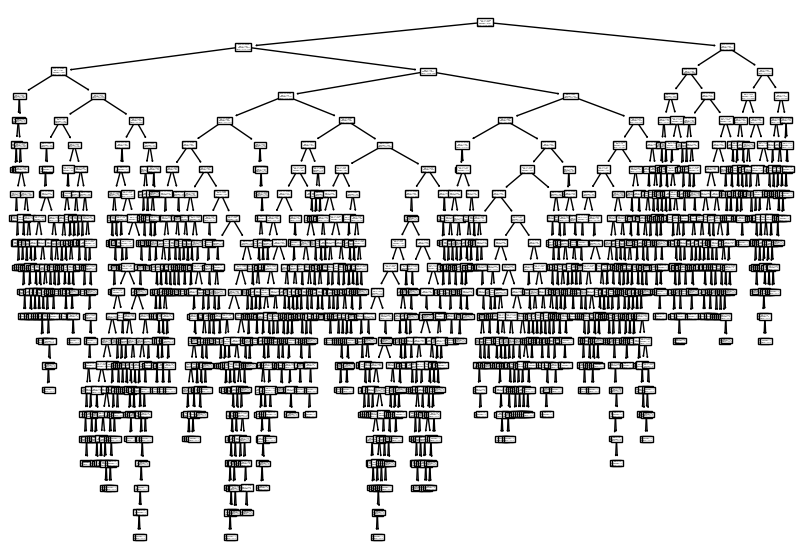

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

decision tree는 위에서 아래로 자라남  
node: decision tree를 구성하는 핵심 요소, train data의 feature에 대한 test를 표현  
branch: test의 결과를 표현  
route node: 맨 위의 node
leaf node: 맨 아래의 node


위 tree는 너무 복잡하니 plot_tree() function에서 max_depth parameter를 사용하여 tree의 depth를 제한해서 출력  
filled parameter를 True로 지정하여 class의 rate에 따라 node를 색칠  
&rarr; decision tree를 더 잘 이해할 수 있음

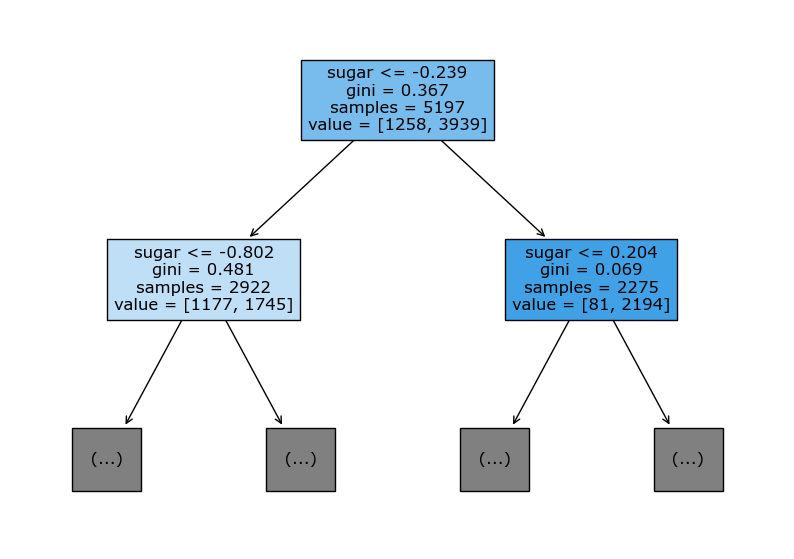

In [11]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

decision tree 설명 (route node 기준)
+ route node는 sugar가 -0.239 이하인지 질문함. sample의 sugar value에 따라 위 질문의 조건에 대해 true이면 왼쪽으로, false이면 오른쪽으로 이동
+ route node에는 5197개의 sample이 있음
+ negative class인 sample은 1258, positive class는 3939개


### *불순도*  
node안의 gini는 gini impurity를 의미  
gini impurity는 DecisionTreeClassifier의 criterion parameter의 basic value인데, criterion parameter에는 node에서 data를 분할할 기준을 정하는 measurment를 전달함


$gini$ $impurity = 1 - $$(negative$ $class$ $rate^2 + positive$ $class$ $rate^2)$  
multi-class라면 class가 더 많아지겠지만, 계산 방법은 동일


terrible node: node 안의 class rate가 1/2일 때  
pure node: node 안에 한가지 class만 있는 node


decision tree는 parent node와 child node의 impurity 차이(information gain)가 최대한 크도록 tree를 자라게 함  
information gain: parent node와 child node의 impurity 차이  


$information$ $gain = parent$ $impurity - (left$ $child$ $sample / parent$ $sample) \times left$ $child$ $impurity - (right$ $child$ $sample / parent$ $sample) \times right$ $child$ $impurity$


### *가지치기*  
이 decision tree model은 limitation 없이 자랐기에 train set보다 test set의 score가 크게 낮았음  
&rarr; 이를 generalization(일반화)이 잘 되지 않았다고 표현


generalization을 위해 pruning(가지치기)를 수행함  
pruning의 가장 간단한 방법은 tree의 max depth를 지정하는 것


DecisionTreeClassifier의 max_depth parameter를 3으로 지정하여 model 만들고 확인하기

In [12]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


model visualization

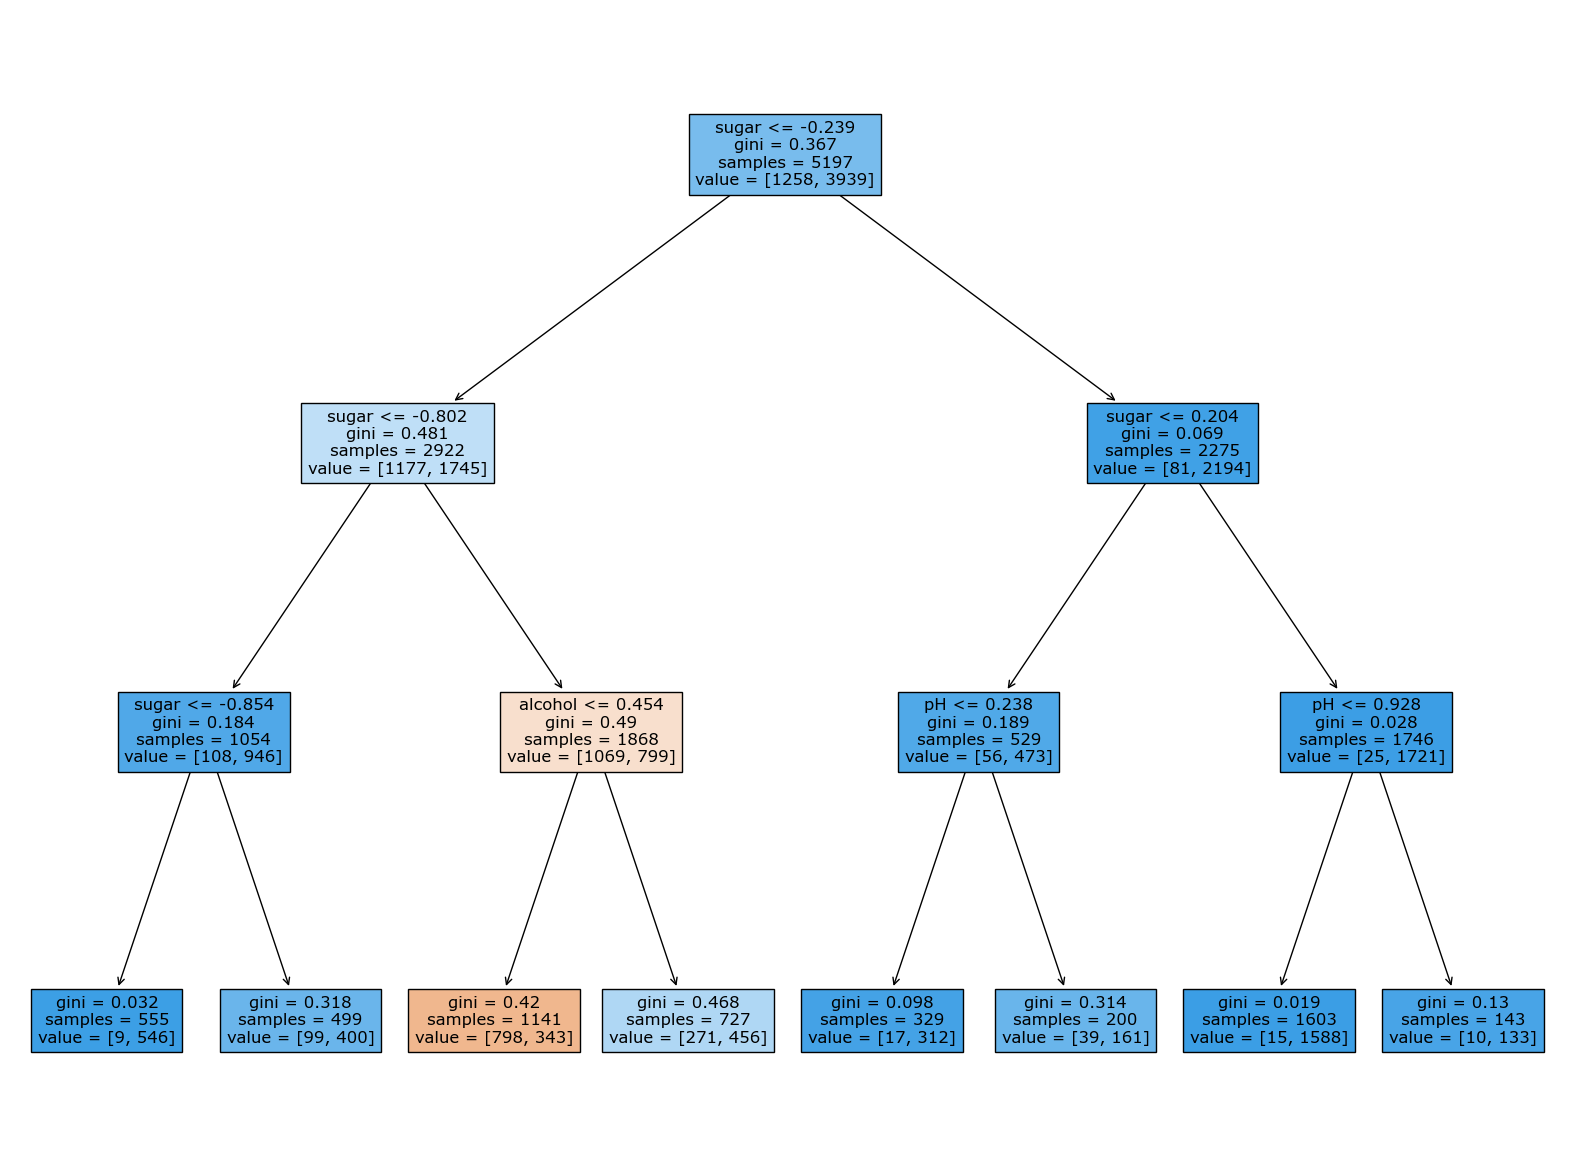

In [13]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

+ route node 다음의 node는 모두 sugar를 기준으로 data를 분할
+ 다음 node는 가장 왼쪽의 node만 sugar를 기준으로 나누고, 왼쪽에서 두 번째는 alcohol, 오른쪽의 두 node는 pH를 기준으로 분할
+ leaf node에서는 왼쪽에서 세 번째에 있는 node만 negative class(red wine)  
   - route node로부터 이 node까지 도달하는 sample의 sugar는 -0.239보다 작고 -0.802보다 커야함
   - alcohol은 0.454보다 작아야함  
   $\therefore$ negative class(red wine): -0.802 < sugar < -0.239인 sample 중 alcohol <= 0.454인 sample


그러나 -0.802라는 sugar vlaue는 직관적이지 않아 이해하기 어려움  
게다가 decision tree는 impurity를 기준으로 sample을 나누고, 이 impurity는 class의 rate를 활용하여 도출  
그렇다면 feature의 scale은 sample의 classification에 아무런 영향을 주지 않음  
$\therefore$ feature scale에 대한 preprocessing이 필요없음  
&rarr; decision tree의 장점 중 하나


preprocessing을 수행하지 않은 train_input, test_input으로 train model, score model

In [14]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


앞선 train_scaled, test_scaled를 사용한 model과 score가 같음


model visualization

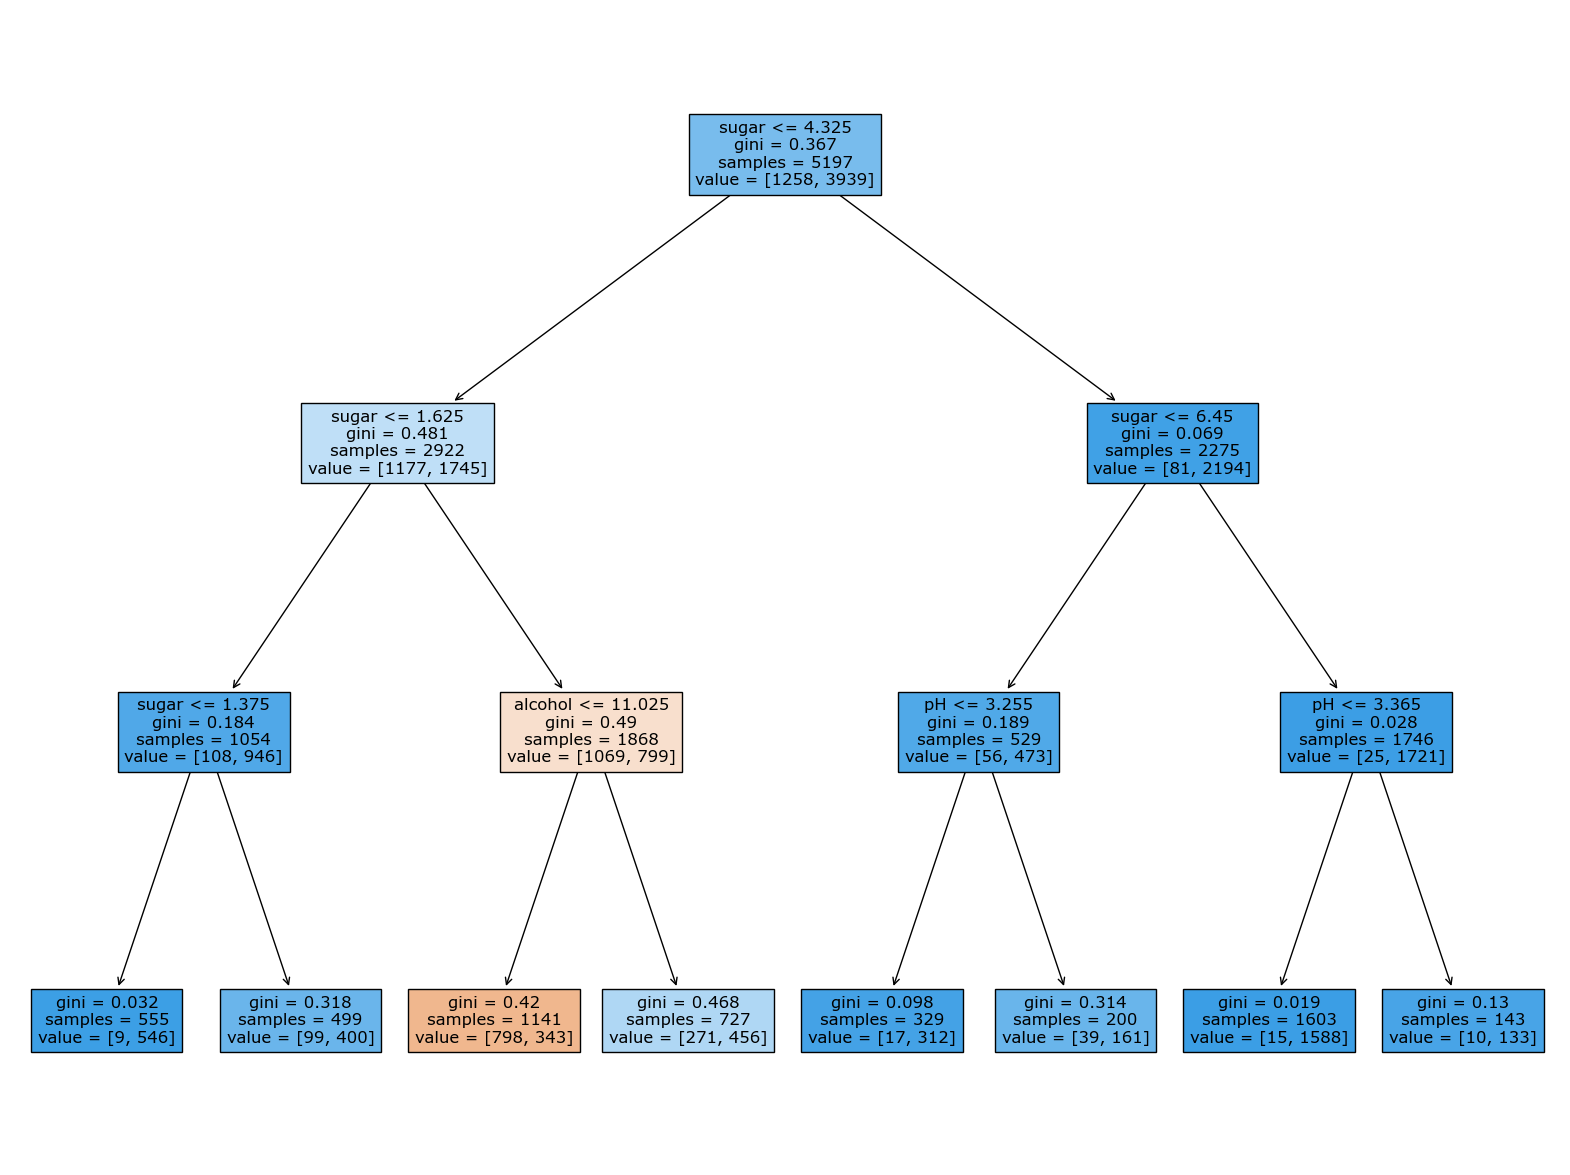

In [15]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

앞선 model과 같은 tree의 형상이지만, feature value를 normalization(z score로 변환)하지 않아 직관적임  
red wine: 1.625 < sugar < 4.325인 sample 중 alcohol <= 11.025인 sample


decision tree는 어떤 feature가 유용한지 그 importance를 계산해 feature_importances_ attribute에 저장해 둠  
feature_importances_ 확인

In [16]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


sugar가 가장 importance가 높음  
&rarr; feature importance를 feature selection에 활용할 수 있음